In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
import netCDF4

#from cartopy import config
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.util import add_cyclic_point

from mpl_toolkits.axes_grid1 import ImageGrid

In [34]:
figfolder = './figures/'

dataset = 'MERRA2'
ver_er = 'ta'
ver_mr = 'T'

ver3 = 'T'
ver4 = 'QV'

unit = 'K'

plev = 'level'
plevIndexer = 'level'

LatIndexer, LonIndexer = 'latitude', 'longitude'
lat = 'latitude'
lon = 'longitude'

dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monavg/'
fn = 'ERA5_normalized_ctp_sc_t_2007_2016_2.5deg_monavg_composited.nc'
data_era_ta = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_dTa_dp_2007_2016_2.5deg_monavg_composited.nc'
data_era_dt_dp = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_w_2007_2016_2.5deg_monavg_composited.nc'
data_era_om = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_q_2007_2016_2.5deg_monavg_composited.nc'
data_era_sh = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_clwc_2007_2016_2.5deg_monavg_composited.nc'
data_era_clwc = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_wspd_2007_2016_2.5deg_monavg_composited.nc'
data_era_wspd = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_q2m_2007_2016_2.5deg_monavg_composited.nc'
data_era_sst = xr.open_dataset(dri+fn)


#dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/'

fn = 'ERA5_normalized_ctp_sc_slhf_2007_2016_2.5deg_monavg_composited.nc'
data_era_sshf = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_t_adv_2007_2016_2.5deg_monavg_composited.nc'
data_era_tadv = xr.open_dataset(dri+fn)

fn = 'ERA5_normalized_ctp_sc_EIS_2007_2016_2.5deg_monavg_composited.nc'
data_era_stress = xr.open_dataset(dri+fn)
#------------------------------------------------------------------------


dri = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monavg/'


fn  = 'MERRA2_normalized_ctp_sc_T_2007_2016_2.5deg_monavg_composited.nc'
data_merra_ta = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_dTa_dp_2007_2016_2.5deg_monavg_composited.nc'
data_merra_dt_dp = xr.open_dataset(dri+fn) 

fn = 'MERRA2_normalized_ctp_sc_w_2007_2016_2.5deg_monavg_composited.nc'
data_merra_om = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_QV_2007_2016_2.5deg_monavg_composited.nc'
data_merra_sh = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_QL_2007_2016_2.5deg_monavg_composited.nc'
data_merra_clwc = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_wspd_2007_2016_2.5deg_monavg_composited.nc'
data_merra_wspd = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_q2m_2007_2016_2.5deg_monavg_composited.nc'
data_merra_sst = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_slhf_2007_2016_2.5deg_monavg_composited.nc'
data_merra_sshf = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_t_adv_2007_2016_2.5deg_monavg_composited.nc'
data_merra_tadv = xr.open_dataset(dri+fn)

fn = 'MERRA2_normalized_ctp_sc_EIS_2007_2016_2.5deg_monavg_composited.nc'
data_merra_stress = xr.open_dataset(dri+fn)


In [3]:
data_era_sshf

<xarray.Dataset> Size: 495kB
Dimensions:    (time: 120, bnds: 2, longitude: 41, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 960B 2007-01-16T09:00:00 ... 2016-12-16T...
  * longitude  (longitude) float64 328B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float64 200B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    slhf       (time, latitude, longitude) float32 492kB ...
Attributes:
    CDI:          Climate Data Interface version 2.5.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    frequency:    mon
    history:      Wed Jul 02 18:03:34 2025: cdo monmean ERA5_normalized_ctp_s...
    CDO:          Climate Data Operators version 2.5.0 (https://mpimet.mpg.de...

In [4]:
lats = -15
latn = 0
lonw = 240
lone = 280

#lev0 = 700
#lev1 = 1000

yr0 = 2007
yrf = 2016

In [5]:
era_ta = data_era_ta['t'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(850,750)}]
era_dt_dp = data_era_dt_dp['dTa_dp'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(900,850)}]
era_om = data_era_om['w'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(1000,850)}]#, plevIndexer: slice(1000,850)}]
era_sh = data_era_sh['q'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(950,850)}]
era_clwc = data_era_clwc['clwc'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(950,750)}]


era_wspd = data_era_wspd['wspd'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
era_sst = data_era_sst['q2m'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
era_sshf = data_era_sshf['slhf'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
era_stress = data_era_stress['EIS'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
era_tadv = data_era_tadv['t_adv'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]


In [6]:
merra_ta= data_merra_ta['T'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer:slice(850,750)}]
merra_dt_dp= data_merra_dt_dp['dTa_dp'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(900,850)}]
merra_om= data_merra_om['w'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(1000,850)}]
merra_sh= data_merra_sh['QV'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone), plevIndexer: slice(9950,850)}]  #slice(900,800)
merra_clwc= data_merra_clwc['QL'][:,::-1,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone),  plevIndexer: slice(950,750)}]


merra_wspd= data_merra_wspd['wspd'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
merra_sst= data_merra_sst['q2m'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
merra_sshf = data_merra_sshf['slhf'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
merra_stress = data_merra_stress['EIS'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]
merra_tadv = data_merra_tadv['t_adv'][:,:,:].loc[{LatIndexer: slice(lats,latn),LonIndexer: slice(lonw,lone)}]


In [7]:
lev = era_ta[''+plev+'']

In [8]:
time_mar= era_ta['time']

In [9]:
# land-sea mask
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lats,latn),longitude=slice(lonw,lone))

In [10]:
lsm

<xarray.DataArray 'lsm' (latitude: 7, longitude: 17)> Size: 952B
[119 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 68B 240.0 242.5 245.0 ... 275.0 277.5 280.0
  * latitude   (latitude) float32 28B -15.0 -12.5 -10.0 -7.5 -5.0 -2.5 0.0
    time       datetime64[ns] 8B 1979-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask

In [11]:
era_ta_yz_mar = era_ta[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))   #.mean(dim=('latitude','longitude')) 
era_om_yz_mar = era_om[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
era_sh_yz_mar = era_sh[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
era_dt_dp_yz_mar = era_dt_dp[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
era_clwc_yz_mar = era_clwc[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
era_sst_yz_mar = era_sst[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('longitude'))
era_wspd_yz_mar = era_wspd[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('longitude'))
era_tadv_yz_mar = era_tadv[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_stress_yz_mar = era_stress[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_sshf_yz_mar = era_sshf[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))

In [12]:
era_ta_yz_annual = era_ta.where(lsm==0).stack(z=('latitude', 'longitude','time'))    
era_om_yz_annual = era_om.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_sh_yz_annual = era_sh.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_dt_dp_yz_annual = era_dt_dp.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_clwc_yz_annual = era_clwc.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_sst_yz_annual = era_sst.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_wspd_yz_annual = era_wspd.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_tadv_yz_annual = era_tadv.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_stress_yz_annual = era_stress.where(lsm==0).stack(z=('latitude', 'longitude','time'))
era_sshf_yz_annaul = era_sshf.where(lsm==0).stack(z=('latitude', 'longitude','time'))

In [13]:
merra_ta_yz_mar = merra_ta[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
merra_om_yz_mar = merra_om[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
merra_dt_dp_yz_mar = merra_dt_dp[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
merra_sh_yz_mar = merra_sh[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
merra_clwc_yz_mar = merra_clwc[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('latitude','longitude'))
merra_wspd_yz_mar = merra_wspd[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('longitude'))
merra_sst_yz_mar = merra_sst[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))

merra_tadv_yz_mar = merra_tadv[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_stress_yz_mar = merra_stress[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_sshf_yz_mar = merra_sshf[8::12,:,:].where(lsm==0).stack(z=('latitude', 'longitude','time'))#.mean(dim=('longitude'))

In [14]:
merra_ta_yz_annual = merra_ta.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_om_yz_annual = merra_om.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_dt_dp_yz_annual = merra_dt_dp.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_sh_yz_annual = merra_sh.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_clwc_yz_annual = merra_clwc.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_wspd_yz_annual = merra_wspd.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_sst_yz_annual = merra_sst.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_tadv_yz_annual = merra_tadv.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_stress_yz_annual = merra_stress.where(lsm==0).stack(z=('latitude', 'longitude','time'))
merra_sshf_yz_annual = merra_sshf.where(lsm==0).stack(z=('latitude', 'longitude','time'))

In [15]:
mon_era_ta_mar = (era_ta_yz_mar-272.15).mean(dim=('level')).dropna(dim = ('z'))
mon_era_om_mar = (era_om_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(86400/100)
mon_era_sh_mar = (era_sh_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_era_clwc_mar = (era_clwc_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_era_dt_dp_mar = (era_dt_dp_yz_mar).mean(dim=('level')).dropna(dim = ('z'))
mon_era_sst_mar = (era_sst_yz_mar).dropna(dim = ('z'))*(1000)
mon_era_wspd_mar = (era_wspd_yz_mar).dropna(dim = ('z'))
mon_era_tadv_mar = (era_tadv_yz_mar).dropna(dim = ('z'))*(86400)
mon_era_sshf_mar = (era_sshf_yz_mar).dropna(dim = ('z'))*(-1/3600)
mon_era_stress_mar = (era_stress_yz_mar).dropna(dim = ('z'))

In [16]:
mon_era_ta_annual = (era_ta_yz_annual-272.15).mean(dim=('level')).dropna(dim = ('z'))
mon_era_om_annual = (era_om_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(86400/100)
mon_era_sh_annual = (era_sh_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_era_clwc_annual = (era_clwc_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_era_dt_dp_annual = (era_dt_dp_yz_annual).mean(dim=('level')).dropna(dim = ('z'))
mon_era_sst_annual = (era_sst_yz_annual).dropna(dim = ('z'))*(1000)
mon_era_wspd_annual = (era_wspd_yz_annual).dropna(dim = ('z'))
mon_era_tadv_annual = (era_tadv_yz_annual).dropna(dim = ('z'))*(86400)
mon_era_sshf_annual = (era_sshf_yz_annaul).dropna(dim = ('z'))*(-1/3600)
mon_era_stress_annual = (era_stress_yz_annual).dropna(dim = ('z'))

In [17]:
mon_merra_ta_mar = (merra_ta_yz_mar-272.15).mean(dim=('level')).dropna(dim = ('z'))
mon_merra_om_mar = (merra_om_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(86400/100)
mon_merra_sh_mar = (merra_sh_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_merra_clwc_mar = (merra_clwc_yz_mar).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_merra_dt_dp_mar = (merra_dt_dp_yz_mar).mean(dim=('level')).dropna(dim = ('z'))
mon_merra_sst_mar = (merra_sst_yz_mar).dropna(dim = ('z'))*(1000)
mon_merra_wspd_mar = (merra_wspd_yz_mar).dropna(dim = ('z'))
mon_merra_sshf_mar = (merra_sshf_yz_mar).dropna(dim = ('z'))
mon_merra_tadv_mar = (merra_tadv_yz_mar).dropna(dim = ('z'))*(86400)
mon_merra_stress_mar = (merra_stress_yz_mar).dropna(dim = ('z'))

In [18]:
mon_merra_ta_annual = (merra_ta_yz_annual-272.15).mean(dim=('level')).dropna(dim = ('z'))
mon_merra_om_annual = (merra_om_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(86400/100)
mon_merra_sh_annual = (merra_sh_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_merra_clwc_annual = (merra_clwc_yz_annual).mean(dim=('level')).dropna(dim = ('z'))*(1000)
mon_merra_dt_dp_annual = (merra_dt_dp_yz_annual).mean(dim=('level')).dropna(dim = ('z'))
mon_merra_sst_annual = (merra_sst_yz_annual).dropna(dim = ('z'))*(1000)
mon_merra_wspd_annual = (merra_wspd_yz_annual).dropna(dim = ('z'))
mon_merra_sshf_annual = (merra_sshf_yz_annual).dropna(dim = ('z'))
mon_merra_tadv_annual = (merra_tadv_yz_annual).dropna(dim = ('z'))*(86400)
mon_merra_stress_annual = (merra_stress_yz_annual).dropna(dim = ('z'))



In [20]:
#lev = mon_era_ta_sep['level'
era_sc_ta_annual_vplot = (mon_era_ta_annual[(mon_era_ta_annual >= np.percentile(mon_era_ta_annual, 5)) & (mon_era_ta_annual <= np.percentile(mon_era_ta_annual, 95))]).values
merra_cu_ta_annual_vplot = (mon_merra_ta_annual[(mon_merra_ta_annual >= np.percentile(mon_merra_ta_annual, 5)) & (mon_merra_ta_annual <= np.percentile(mon_merra_ta_annual, 95))]).values


era_sc_ta_mar_vplot = (mon_era_ta_mar[(mon_era_ta_mar >= np.percentile(mon_era_ta_mar, 5)) & (mon_era_ta_mar <= np.percentile(mon_era_ta_mar, 95))]).values
merra_cu_ta_mar_vplot = (mon_merra_ta_mar[(mon_merra_ta_mar >= np.percentile(mon_merra_ta_mar, 5)) & (mon_merra_ta_mar <= np.percentile(mon_merra_ta_mar, 95))]).values

In [21]:
era_sc_dt_dp_annual_vplot = (mon_era_dt_dp_annual[(mon_era_dt_dp_annual >= np.percentile(mon_era_dt_dp_annual, 5)) & (mon_era_dt_dp_annual <= np.percentile(mon_era_dt_dp_annual, 95))]).values
merra_cu_dt_dp_annual_vplot = (mon_merra_dt_dp_annual[(mon_merra_dt_dp_annual >= np.percentile(mon_merra_dt_dp_annual, 5)) & (mon_merra_dt_dp_annual <= np.percentile(mon_merra_dt_dp_annual, 95))]).values



era_sc_dt_dp_mar_vplot = (mon_era_dt_dp_mar[(mon_era_dt_dp_mar >= np.percentile(mon_era_dt_dp_mar, 5)) & (mon_era_dt_dp_mar <= np.percentile(mon_era_dt_dp_mar, 95))]).values
merra_cu_dt_dp_mar_vplot = (mon_merra_dt_dp_mar[(mon_merra_dt_dp_mar >= np.percentile(mon_merra_dt_dp_mar, 5)) & (mon_merra_dt_dp_mar <= np.percentile(mon_merra_dt_dp_mar, 95))]).values

In [22]:
# Sample data
ta_mar = {
    'Annual': {'ERA5': era_sc_ta_annual_vplot, 'MERRA2': merra_cu_ta_annual_vplot},
    'Sep': {'ERA5':  era_sc_ta_mar_vplot, 'MERRA2': merra_cu_ta_mar_vplot}}
    #'Sep': {'Sc': mon_era_ta[8,:].values}}#, 'MERRA2': mon_merra_ta[8,:].values}}





# Sample data
dta_dp_mar = {
    'Annual': {'ERA5': era_sc_dt_dp_annual_vplot, 'MERRA2': merra_cu_dt_dp_annual_vplot},
    'Sep': {'ERA5': era_sc_dt_dp_mar_vplot, 'MERRA2': merra_cu_dt_dp_mar_vplot}
    #'Sep': {'ERA5': mon_era_dt_dp[8,:].values, 'MERRA2': mon_merra_dt_dp[8,:].values}
}

In [23]:
era_sc_om_annual_vplot = (mon_era_om_annual[(mon_era_om_annual >= np.percentile(mon_era_om_annual, 5)) & (mon_era_om_annual <= np.percentile(mon_era_om_annual, 95))]).values
merra_cu_om_annual_vplot = (mon_merra_om_annual[(mon_merra_om_annual >= np.percentile(mon_merra_om_annual, 5)) & (mon_merra_om_annual <= np.percentile(mon_merra_om_annual, 95))]).values



era_sc_om_mar_vplot = (mon_era_om_mar[(mon_era_om_mar >= np.percentile(mon_era_om_mar, 5)) & (mon_era_om_mar <= np.percentile(mon_era_om_mar, 95))]).values
merra_cu_om_mar_vplot = (mon_merra_om_mar[(mon_merra_om_mar >= np.percentile(mon_merra_om_mar, 5)) & (mon_merra_om_mar <= np.percentile(mon_merra_om_mar, 95))]).values

In [24]:
era_sc_clwc_annual_vplot = (mon_era_clwc_annual[(mon_era_clwc_annual >= np.percentile(mon_era_clwc_annual, 5)) & (mon_era_clwc_annual <= np.percentile(mon_era_clwc_annual, 95))]).values
merra_cu_clwc_annual_vplot = (mon_merra_clwc_annual [(mon_merra_clwc_annual >= np.percentile(mon_merra_clwc_annual, 5)) & (mon_merra_clwc_annual <= np.percentile(mon_merra_clwc_annual, 95))]).values

era_sc_clwc_mar_vplot = (mon_era_clwc_mar[ (mon_era_clwc_mar >= np.percentile(mon_era_clwc_mar, 5)) & (mon_era_clwc_mar <= np.percentile(mon_era_clwc_mar, 95))]).values
merra_cu_clwc_mar_vplot =  (mon_merra_clwc_mar[(mon_merra_clwc_mar >= np.percentile(mon_merra_clwc_mar, 5)) & (mon_merra_clwc_mar <= np.percentile(mon_merra_clwc_mar, 95))]).values

In [25]:
era_sc_sh_annual_vplot = (mon_era_sh_annual[(mon_era_sh_annual >= np.percentile(mon_era_sh_annual, 5)) & (mon_era_sh_annual <= np.percentile(mon_era_sh_annual, 95))]).values
merra_cu_sh_annual_vplot = (mon_merra_sh_annual [(mon_merra_sh_annual >= np.percentile(mon_merra_sh_annual, 5)) & (mon_merra_sh_annual <= np.percentile(mon_merra_sh_annual, 95))]).values

era_sc_sh_mar_vplot = (mon_era_sh_mar[ (mon_era_sh_mar >= np.percentile(mon_era_sh_mar, 5)) & (mon_era_sh_mar <= np.percentile(mon_era_sh_mar, 95))]).values
merra_cu_sh_mar_vplot =  (mon_merra_sh_mar[(mon_merra_sh_mar >= np.percentile(mon_merra_sh_mar, 5)) & (mon_merra_sh_mar <= np.percentile(mon_merra_sh_mar, 95))]).values

In [26]:
era_sc_sst_annual_vplot = (mon_era_sst_annual[(mon_era_sst_annual >= np.percentile(mon_era_sst_annual, 5)) & (mon_era_sst_annual <= np.percentile(mon_era_sst_annual, 95))]).values
merra_cu_sst_annual_vplot = (mon_merra_sst_annual [(mon_merra_sst_annual >= np.percentile(mon_merra_sst_annual, 5)) & (mon_merra_sst_annual <= np.percentile(mon_merra_sst_annual, 95))]).values

era_sc_sst_mar_vplot = (mon_era_sst_mar[(mon_era_sst_mar >= np.percentile(mon_era_sst_mar, 5)) & (mon_era_sst_mar <= np.percentile(mon_era_sst_mar, 95))]).values
merra_cu_sst_mar_vplot =  (mon_merra_sst_mar[(mon_merra_sst_mar >= np.percentile(mon_merra_sst_mar, 5)) & (mon_merra_sst_mar <= np.percentile(mon_merra_sst_mar, 95))]).values

In [27]:
era_sc_wspd_annual_vplot = (mon_era_wspd_annual[(mon_era_wspd_annual >= np.percentile(mon_era_wspd_annual, 5)) & (mon_era_wspd_annual <= np.percentile(mon_era_wspd_annual, 95))]).values
merra_cu_wspd_annual_vplot = (mon_merra_wspd_annual [(mon_merra_wspd_annual >= np.percentile(mon_merra_wspd_annual, 5))  & (mon_merra_wspd_annual <= np.percentile(mon_merra_wspd_annual, 95))]).values

era_sc_wspd_mar_vplot = (mon_era_wspd_mar[(mon_era_wspd_mar >= np.percentile(mon_era_wspd_mar, 5)) & (mon_era_wspd_mar <= np.percentile(mon_era_wspd_mar, 95))]).values
merra_cu_wspd_mar_vplot =  (mon_merra_wspd_mar[(mon_merra_wspd_mar >= np.percentile(mon_merra_wspd_mar, 5)) & (mon_merra_wspd_mar <= np.percentile(mon_merra_wspd_mar, 95))]).values

In [28]:
era_sc_tadv_annual_vplot = (mon_era_tadv_annual[(mon_era_tadv_annual >= np.percentile(mon_era_tadv_annual, 5)) & (mon_era_tadv_annual <= np.percentile(mon_era_tadv_annual, 95))]).values
merra_cu_tadv_annual_vplot = (mon_merra_tadv_annual [(mon_merra_tadv_annual >= np.percentile(mon_merra_tadv_annual, 5))  & (mon_merra_tadv_annual <= np.percentile(mon_merra_tadv_annual, 95))]).values

era_sc_tadv_mar_vplot = (mon_era_tadv_mar[(mon_era_tadv_mar >= np.percentile(mon_era_tadv_mar, 5)) & (mon_era_tadv_mar <= np.percentile(mon_era_tadv_mar, 95))]).values
merra_cu_tadv_mar_vplot =  (mon_merra_tadv_mar[(mon_merra_tadv_mar >= np.percentile(mon_merra_tadv_mar, 5)) & (mon_merra_tadv_mar <= np.percentile(mon_merra_tadv_mar, 95))]).values

In [29]:
era_sc_slhf_annual_vplot = (mon_era_sshf_annual[(mon_era_sshf_annual >= np.percentile(mon_era_sshf_annual, 5)) & (mon_era_sshf_annual <= np.percentile(mon_era_sshf_annual, 95))]).values
merra_cu_slhf_annual_vplot = (mon_merra_sshf_annual [(mon_merra_sshf_annual >= np.percentile(mon_merra_sshf_annual, 5))  & (mon_merra_sshf_annual <= np.percentile(mon_merra_sshf_annual, 95))]).values

era_sc_slhf_mar_vplot = (mon_era_sshf_mar[(mon_era_sshf_mar >= np.percentile(mon_era_sshf_mar, 5)) & (mon_era_sshf_mar <= np.percentile(mon_era_sshf_mar, 95))]).values
merra_cu_slhf_mar_vplot =  (mon_merra_sshf_mar[(mon_merra_sshf_mar >= np.percentile(mon_merra_sshf_mar, 5)) & (mon_merra_sshf_mar <= np.percentile(mon_merra_sshf_mar, 95))]).values

In [30]:
era_sc_lts_annual_vplot = (mon_era_stress_annual[(mon_era_stress_annual >= np.percentile(mon_era_stress_annual, 5)) & (mon_era_stress_annual <= np.percentile(mon_era_stress_annual, 95))]).values
merra_cu_lts_annual_vplot = (mon_merra_stress_annual [(mon_merra_stress_annual >= np.percentile(mon_merra_stress_annual, 5))  & (mon_merra_stress_annual <= np.percentile(mon_merra_stress_annual, 95))]).values

era_sc_lts_mar_vplot = (mon_era_stress_mar[(mon_era_stress_mar >= np.percentile(mon_era_stress_mar, 5)) & (mon_era_stress_mar <= np.percentile(mon_era_stress_mar, 95))]).values
merra_cu_lts_mar_vplot =  (mon_merra_stress_mar[(mon_merra_stress_mar >= np.percentile(mon_merra_stress_mar, 5)) & (mon_merra_stress_mar <= np.percentile(mon_merra_stress_mar, 95))]).values

In [31]:
# Sample data
om_mar = {
    'Annual': {'ERA5': era_sc_om_annual_vplot, 'MERRA2': merra_cu_om_annual_vplot},
    'Sep': {'ERA5':  era_sc_om_mar_vplot, 'MERRA2': merra_cu_om_mar_vplot}
    #'Sep': {'ERA5': mon_era_om[8,:].values, 'MERRA2': mon_merra_om[8,:].values}
}


# Sample data
sh_mar = {
    'Annual': {'ERA5':era_sc_sh_annual_vplot, 'MERRA2': merra_cu_sh_mar_vplot},
    'Sep': {'ERA5':  era_sc_sh_mar_vplot, 'MERRA2': merra_cu_sh_mar_vplot}
   # 'Sep': {'ERA5': mon_era_sh[8,:].values, 'MERRA2': mon_merra_sh[8,:].values}
}


# Sample data
clwc_mar = {
    'Annual': {'ERA5': era_sc_clwc_annual_vplot, 'MERRA2':merra_cu_clwc_annual_vplot},
    'Sep': {'ERA5':  era_sc_clwc_mar_vplot, 'MERRA2': merra_cu_clwc_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}

sst_mar = {
    'Annual': {'ERA5': era_sc_sst_annual_vplot, 'MERRA2': merra_cu_sst_annual_vplot},
    'Sep': {'ERA5':  era_sc_sst_mar_vplot, 'MERRA2': merra_cu_sst_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}

wspd_mar = {
    'Annual': {'ERA5': era_sc_wspd_annual_vplot, 'MERRA2': merra_cu_wspd_annual_vplot},
    'Sep': {'ERA5':  era_sc_wspd_mar_vplot, 'MERRA2':merra_cu_wspd_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}


tadv_mar = {
    'Annual': {'ERA5': era_sc_tadv_annual_vplot, 'MERRA2': merra_cu_tadv_annual_vplot},
    'Sep': {'ERA5':  era_sc_tadv_mar_vplot, 'MERRA2': merra_cu_tadv_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}


slhf_mar = {
    'Annual': {'ERA5': era_sc_slhf_annual_vplot, 'MERRA2': merra_cu_slhf_annual_vplot},
    'Sep': {'ERA5':  era_sc_slhf_mar_vplot, 'MERRA2': merra_cu_slhf_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}


lts_mar = {
    'Annual': {'ERA5': era_sc_lts_annual_vplot, 'MERRA2': merra_cu_lts_annual_vplot},
    'Sep': {'ERA5':  era_sc_lts_mar_vplot, 'MERRA2': merra_cu_lts_mar_vplot}
   # 'Sep': {'ERA5': mon_era_clwc[8,:].values, 'MERRA2': mon_merra_clwc[8,:].values}
}

In [32]:
from matplotlib.ticker import FormatStrFormatter

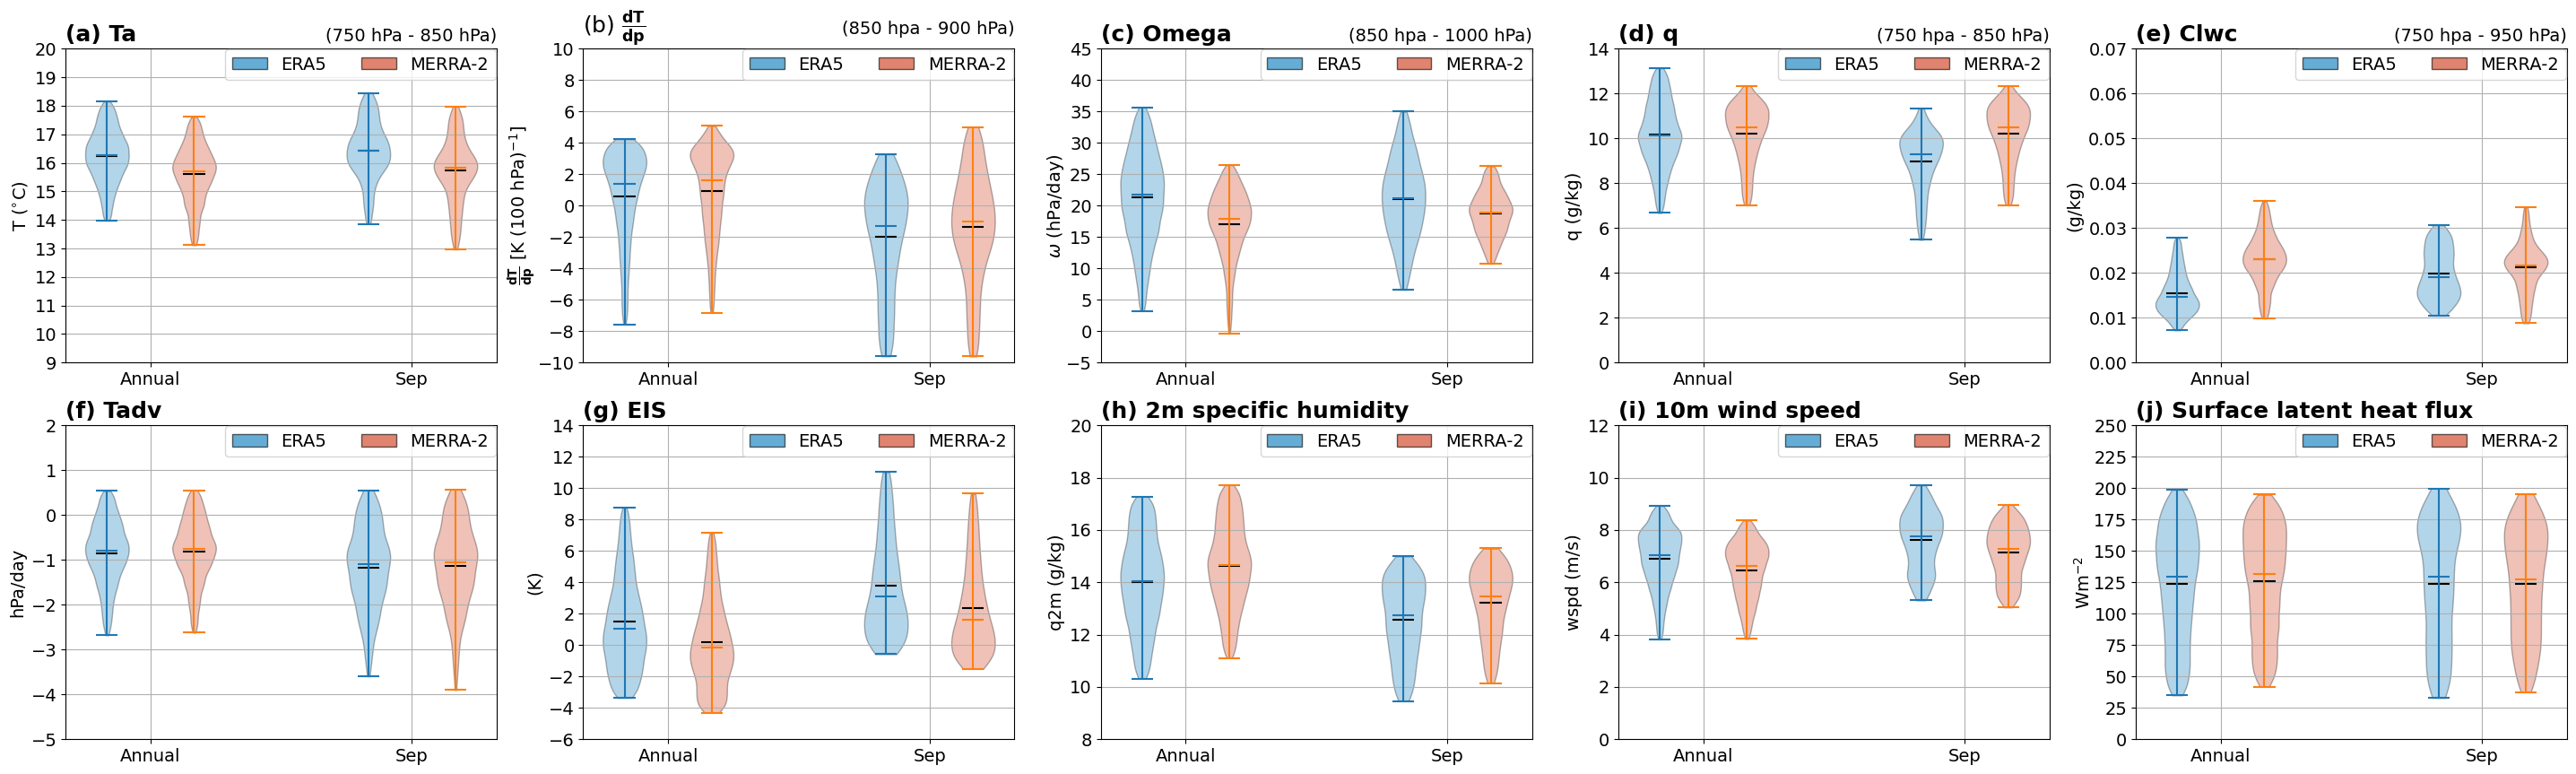

In [33]:
colors = ["#0077BB","#CC3311"]
fs = 14


npan = 5
props = dict(boxstyle='square', facecolor='white', alpha=0.8)

fig = plt.figure(figsize=(36, 10))#, tight_layout=True)
for j in range(0,10,1):
    ax = fig.add_subplot(2, npan, j+1)
    if j == 0:
        num_categories = len(ta_mar)
        num_variables = len(next(iter(ta_mar.values())))
        positions = np.arange(num_categories) * (num_variables + 1)

        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_ta_mar = [ta_mar[category][variable] for category in ta_mar.keys()]
            box_plot = ax.violinplot(variable_ta_mar, positions=positions + i,showmeans = True,showmedians=True)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-')
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
# Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(a) Ta', loc = 'left', fontsize = 18, pad = 20,fontweight='bold')
        ax.set_title('(750 hPa - 850 hPa)', loc = 'right', fontsize = 14)
        ax.set_ylabel('T ($^{\circ}$C)', fontsize = fs)
        #ax.set_ylim(12, 22)
        ax.set_yticks(np.arange(9,21, 1))
        #plt.xlabel('Months')
        plt.grid()
# Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)

       

    if j == 1:
        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_dta_dp_mar = [dta_dp_mar[category][variable] for category in dta_dp_mar.keys()]
            box_plot = ax.violinplot(variable_dta_dp_mar, positions=positions + i,showmeans = True,showmedians=True)# patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')

       # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title(r'(b) $\mathbf{ \frac {d{T}}{dp}}$', loc = 'left', fontsize = 18, pad = 20)
        ax.set_title('(850 hpa - 900 hPa)', loc = 'right', fontsize = 14)
        ax.set_ylabel(r'$\mathbf{ \frac {d{T}}{dp}}$ [K (100 hPa)$^{-1}$]', labelpad = -0.05, fontsize = fs )
        ax.set_ylim(-10, 10)
        #plt.xlabel('Months')
        ax.set_yticks(np.arange(-10,12, 2))

        plt.grid()
        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)


    if j ==2:
       
        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_om_mar = [om_mar[category][variable] for category in om_mar.keys()]
            box_plot = ax.violinplot(variable_om_mar, positions=positions + i, showmeans = True,showmedians=True)#patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(c) Omega', loc = 'left', fontsize = 18,fontweight='bold')
        ax.set_title('(850 hpa - 1000 hPa)', loc = 'right', fontsize = 14)
        ax.set_ylabel('$\omega$ (hPa/day)', labelpad = 0.01, fontsize = fs)
        ax.set_ylim(-5, 45)
        #plt.xlabel('Months')
        plt.grid()
        ax.set_yticks(np.arange(-5, 50, 5))

        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)



    if j ==3:

        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_sh_mar = [sh_mar[category][variable] for category in sh_mar.keys()]
            box_plot = ax.violinplot(variable_sh_mar, positions=positions + i,showmeans = True,showmedians=True)#, patch_artist=True, widths=0.6, showmeans = True)#, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            #box_plot['bodies'].set_facecolor(colors[i])
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
                
                
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(d) q', loc = 'left', fontsize = 18,fontweight='bold')
        ax.set_title('(750 hpa - 850 hPa)', loc = 'right', fontsize = 14)
        ax.set_ylabel('q (g/kg)', fontsize = fs)
        #ax.set_ylim(285, 290)
        #plt.xlabel('Months')
        plt.grid()
        ax.set_ylim(0, 14)
    
        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)



    


    if j ==4:

        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_clwc_mar = [clwc_mar[category][variable] for category in clwc_mar.keys()]
            box_plot = ax.violinplot(variable_clwc_mar, positions=positions + i, showmeans = True,showmedians=True)#patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')

      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(e) Clwc', loc = 'left', fontsize = 18,fontweight='bold')
        ax.set_ylabel('(g/kg)', fontsize = fs)
        ax.set_title('(750 hpa - 950 hPa)', loc = 'right', fontsize = 14)
        #ax.set_ylim(285, 290)
        #plt.xlabel('Months')
        plt.grid()
        #ax.set_ylim(0.005, .040)
        #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        #ax.set_ylim(0, .04)
        ax.set_yticks(np.arange(0,.08, .01))

         # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)


    if j ==5:

        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_tadv_mar = [tadv_mar[category][variable] for category in tadv_mar.keys()]
            box_plot = ax.violinplot(variable_tadv_mar, positions=positions + i,showmeans = True,showmedians=True)#, patch_artist=True, widths=0.6, showmeans = True)#, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            #box_plot['bodies'].set_facecolor(colors[i])
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
                
                
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(f) Tadv', loc = 'left', fontsize = 18,fontweight='bold')
        ax.set_ylabel('hPa/day', fontsize = fs)
        #ax.set_ylim(285, 290)
        #plt.xlabel('Months')
        plt.grid()
        ax.set_ylim(-5, 2)
        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)   
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)

        


    if j ==6:
       
        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_lts_mar = [lts_mar[category][variable] for category in lts_mar.keys()]
            box_plot = ax.violinplot(variable_lts_mar, positions=positions + i, showmeans = True,showmedians=True)#patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(g) EIS', loc = 'left', fontsize = 18, fontweight = 'bold')
        ax.set_ylabel('(K)', fontsize = fs)
        ax.set_ylim(-6, 14)
        ax.set_yticks(np.arange(-6,16, 2))
        #plt.xlabel('Months')
        plt.grid()

        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)   
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)

    if j ==7:

        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_sst_mar = [sst_mar[category][variable] for category in sst_mar.keys()]
            box_plot = ax.violinplot(variable_sst_mar, positions=positions + i,showmeans = True,showmedians=True)#, patch_artist=True, widths=0.6, showmeans = True)#, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            #box_plot['bodies'].set_facecolor(colors[i])
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
                
                
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(h) 2m specific humidity ', loc = 'left', fontsize = 18,fontweight='bold')
        ax.set_ylabel('q2m (g/kg)', fontsize = fs)
        ax.set_ylim(8, 20)
        #plt.xlabel('Months')
        plt.grid()
        #ax.set_ylim(0, .06)
        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs) 
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)    


    if j == 8:


        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_wspd_mar = [wspd_mar[category][variable] for category in wspd_mar.keys()]
            box_plot = ax.violinplot(variable_wspd_mar, positions=positions + i, showmeans = True,showmedians=True)#patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(i) 10m wind speed', loc = 'left', fontsize = 18, fontweight = 'bold')
        ax.set_ylabel('wspd (m/s)', fontsize = fs)
        ax.set_ylim(0, 12)
        #plt.xlabel('Months')
        plt.grid()

        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)  
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)



    if j == 9:


        for i, (variable, color) in enumerate(zip(['ERA5', 'MERRA2'], ["#0077BB","#CC3311"])):
            variable_slhf_mar = [slhf_mar[category][variable] for category in slhf_mar.keys()]
            box_plot = ax.violinplot(variable_slhf_mar, positions=positions + i, showmeans = True,showmedians=True)#patch_artist=True, widths=0.6, showmeans = True, meanprops={"marker": "o",
                       #"markeredgecolor": "black", "markerfacecolor":"black",
                       #"markersize": "4"},)
            #for patch in box_plot['boxes']:
                #patch.set_facecolor(color)
            box_plot['cmeans'].set_color('black')   # Change the mean line to red
            box_plot['cmeans'].set_linestyle('-') 
            for pc in box_plot['bodies']:
                pc.set_facecolor(colors[i])
                pc.set_edgecolor('black')
      # Customizing the plot
        ax.set_xticks(positions+0.5 )
        ax.set_xticklabels(ta_mar.keys())
        ax.set_title('(j) Surface latent heat flux', loc = 'left', fontsize = 18, fontweight = 'bold')
        ax.set_ylabel('Wm$^{ {\minus}2}$', fontsize = fs, labelpad = -.01)
        #ax.set_ylim(-0, 15)
        #plt.xlabel('Months')
        plt.grid()

        
      # Adding a legend
        legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black', label=var, alpha = 0.6) 
                   for var, color in zip(['ERA5', 'MERRA-2'], ["#0077BB","#CC3311"])]
        ax.legend(handles=legend_elements, loc=(0.37, 0.9), ncol =2, fontsize = fs)  
        ax.tick_params(axis='x', labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_yticks(np.arange(0,275, 25))


    
        
#plt.text(.15, 1, '', transform=fig.transFigure, horizontalalignment='center')


        
        #ax.legend(handles=legend_elements, loc='lower center', ncol=3,fontsize=10,bbox_to_anchor=(0.,-.28, 1, 8))
plt.savefig(figfolder+'Sep_ERA5_MERRA2_normalized_ctp_sc_vplot_'+str(yr0)+'-'+str(yrf)+'.pdf' ,bbox_inches="tight",transparent=False)        